In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Aviation Project/database.csv")


<ipython-input-88-2899eccb1447>:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Aviation Project/database.csv")


In [ ]:
data.rename(columns={"Engine1 Position":"Engine1_Position", "Engine2 Position":"Engine2_Position", "Engine3 Position":"Engine3_Position", "Engine4 Position":"Engine4_Position"}, inplace=True)
target = 'C'
target_2 = "CHANGE CODE"
print (data.columns)
data.query('Engine1_Position != @target', inplace=True)
data.query('Engine3_Position != @target_2', inplace=True)

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1_Position', 'Engine2_Position',
       'Engine3_Position', 'Engine4_Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [ ]:
target_cols = ['Engine1_Position', 'Engine2_Position', 'Engine3_Position', 'Engine4_Position']
data[target_cols] = data[target_cols].apply(pd.to_numeric) #CHange any stray strings to numeric values

In [ ]:
data.drop(columns = ["Airport", "Operator", "Record ID", "Species Name"], inplace=True)

In [ ]:
dummy_cols = ['Incident Year', 'Incident Month', 'Incident Day', 'Operator ID',
              'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Engine Make', 'Engine Model',
              'Engine Type', 'Engine1_Position', 'Engine2_Position',
              'Engine3_Position', 'Engine4_Position', 'Airport ID', 'State',
              'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
              'Precipitation', 'Species ID', "Species Quantity"]

In [ ]:
data.replace({"ENGINE SHUT DOWN" : "ENGINE SHUTDOWN"}, inplace=True)

In [ ]:
data["Fatalities"].fillna(0, inplace=True)
data["Injuries"].fillna(0, inplace=True)
#data.dropna(inplace=True)

In [ ]:
print(data.columns)

Index(['Incident Year', 'Incident Month', 'Incident Day', 'Operator ID',
       'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model',
       'Aircraft Mass', 'Engine Make', 'Engine Model', 'Engines',
       'Engine Type', 'Engine1_Position', 'Engine2_Position',
       'Engine3_Position', 'Engine4_Position', 'Airport ID', 'State',
       'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Quantity', 'Flight Impact', 'Fatalities', 'Injuries',
       'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fusel

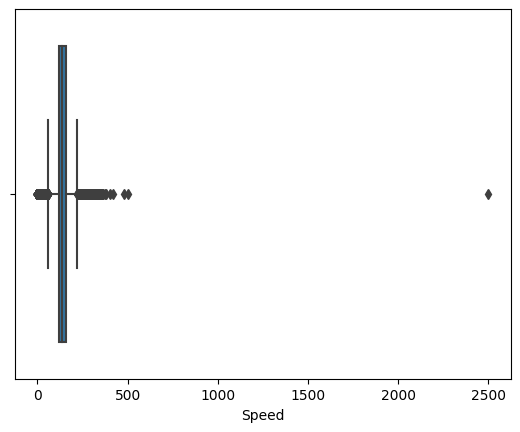

In [ ]:
plt.figure() #figsize=(20, 20)
sns.boxplot(data, x="Speed")
plt.show()

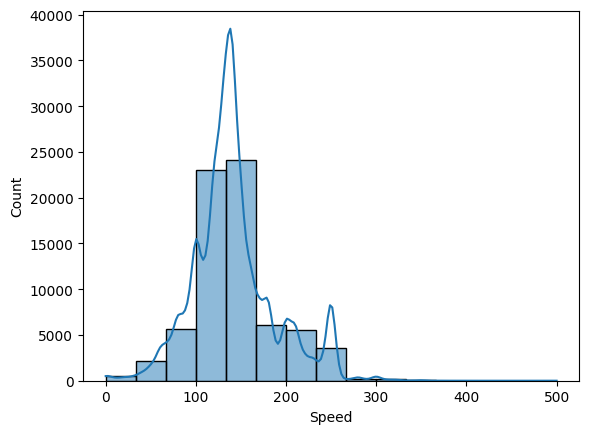

In [ ]:
plt.figure() #figsize=(20, 20)
sns.histplot(data.query("Speed<1500"), x="Speed", bins=15, kde=True)
plt.show()

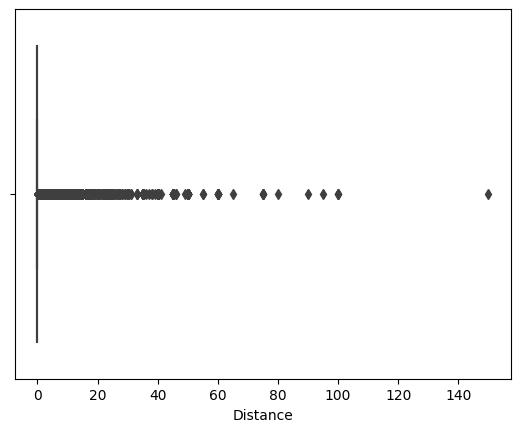

In [ ]:
plt.figure() #figsize=(20, 20)
sns.boxplot(data, x="Distance")
plt.show()

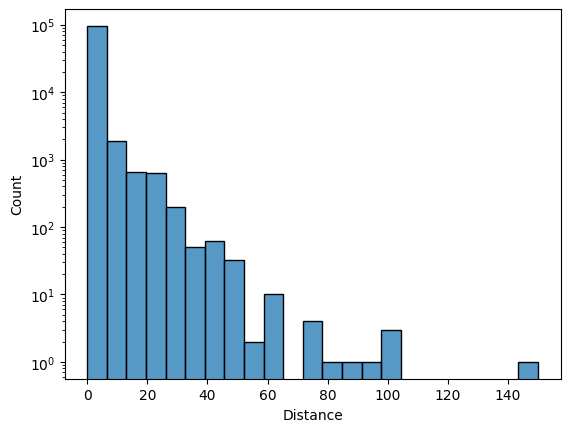

In [ ]:
plt.figure() #figsize=(20, 20)
sns.histplot(data, x="Distance", bins=23)
plt.yscale("log")
plt.show()

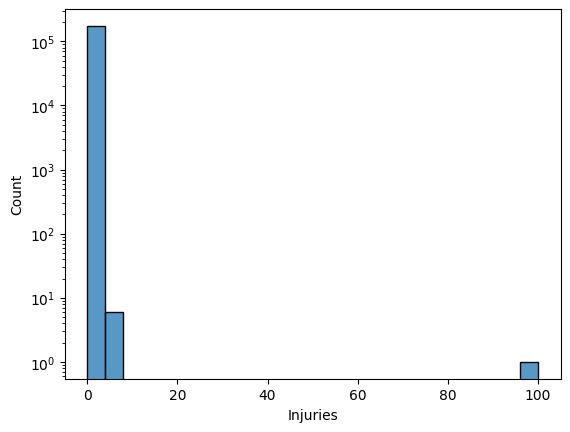

In [ ]:
plt.figure() #figsize=(20, 20)
sns.histplot(data, x="Injuries", bins=25)
plt.yscale("log")
plt.show()

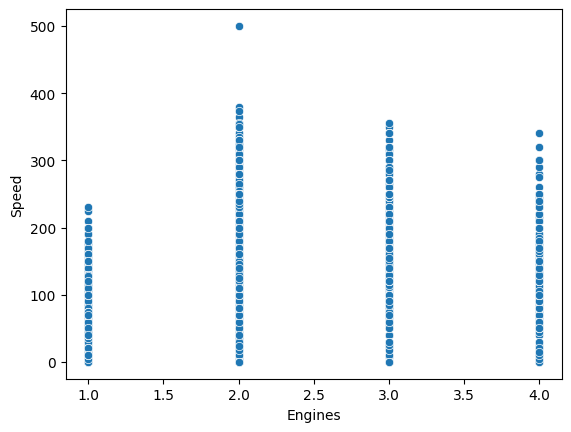

In [ ]:
plt.figure
sns.scatterplot(data, x="Engines", y="Speed")
plt.show()

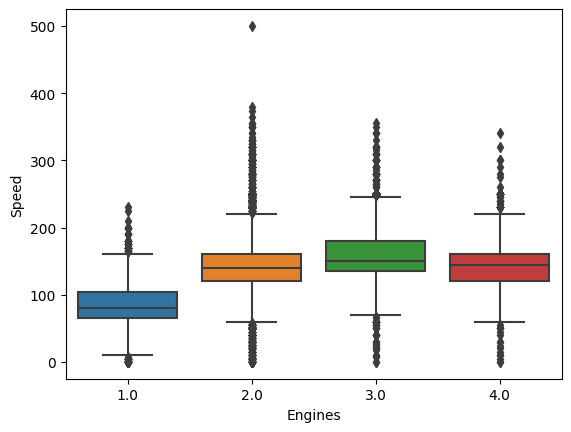

In [ ]:
plt.figure
sns.boxplot(data, x="Engines", y="Speed")
plt.show()

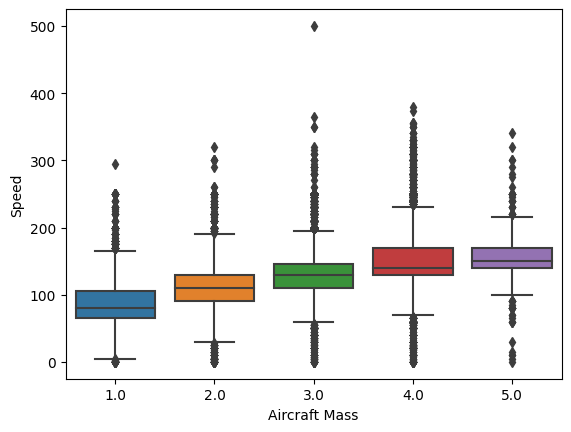

In [ ]:
plt.figure
sns.boxplot(data, x="Aircraft Mass", y="Speed")
plt.show()

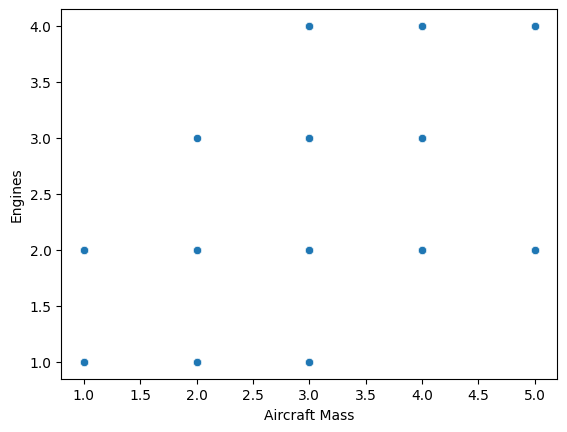

In [ ]:
plt.figure
sns.scatterplot(data, x="Aircraft Mass", y="Engines")
plt.show()

In [ ]:
print(data[["Aircraft Mass", "Engines"]].corr())

               Aircraft Mass  Engines
Aircraft Mass        1.00000  0.51557
Engines              0.51557  1.00000


In [ ]:
print(data.corr())

<ipython-input-113-40835d1ef585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


                      Incident Year  Incident Month  Incident Day  \
Incident Year              1.000000       -0.031846      0.003238   
Incident Month            -0.031846        1.000000     -0.045090   
Incident Day               0.003238       -0.045090      1.000000   
Aircraft Mass              0.046786       -0.001352     -0.002197   
Engine Make               -0.229516        0.007055      0.000046   
Engines                   -0.091574       -0.001665     -0.003672   
Engine1_Position          -0.123501        0.005575      0.004753   
Engine2_Position          -0.123918        0.009125      0.006589   
Engine3_Position          -0.343047        0.023640     -0.009972   
Engine4_Position           0.342613       -0.012094      0.005056   
Height                     0.029885        0.031549     -0.001894   
Speed                      0.053299        0.027292     -0.004922   
Distance                   0.068045        0.017363     -0.001457   
Fatalities                -0.00136

<ipython-input-116-e2dcaf003c8e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

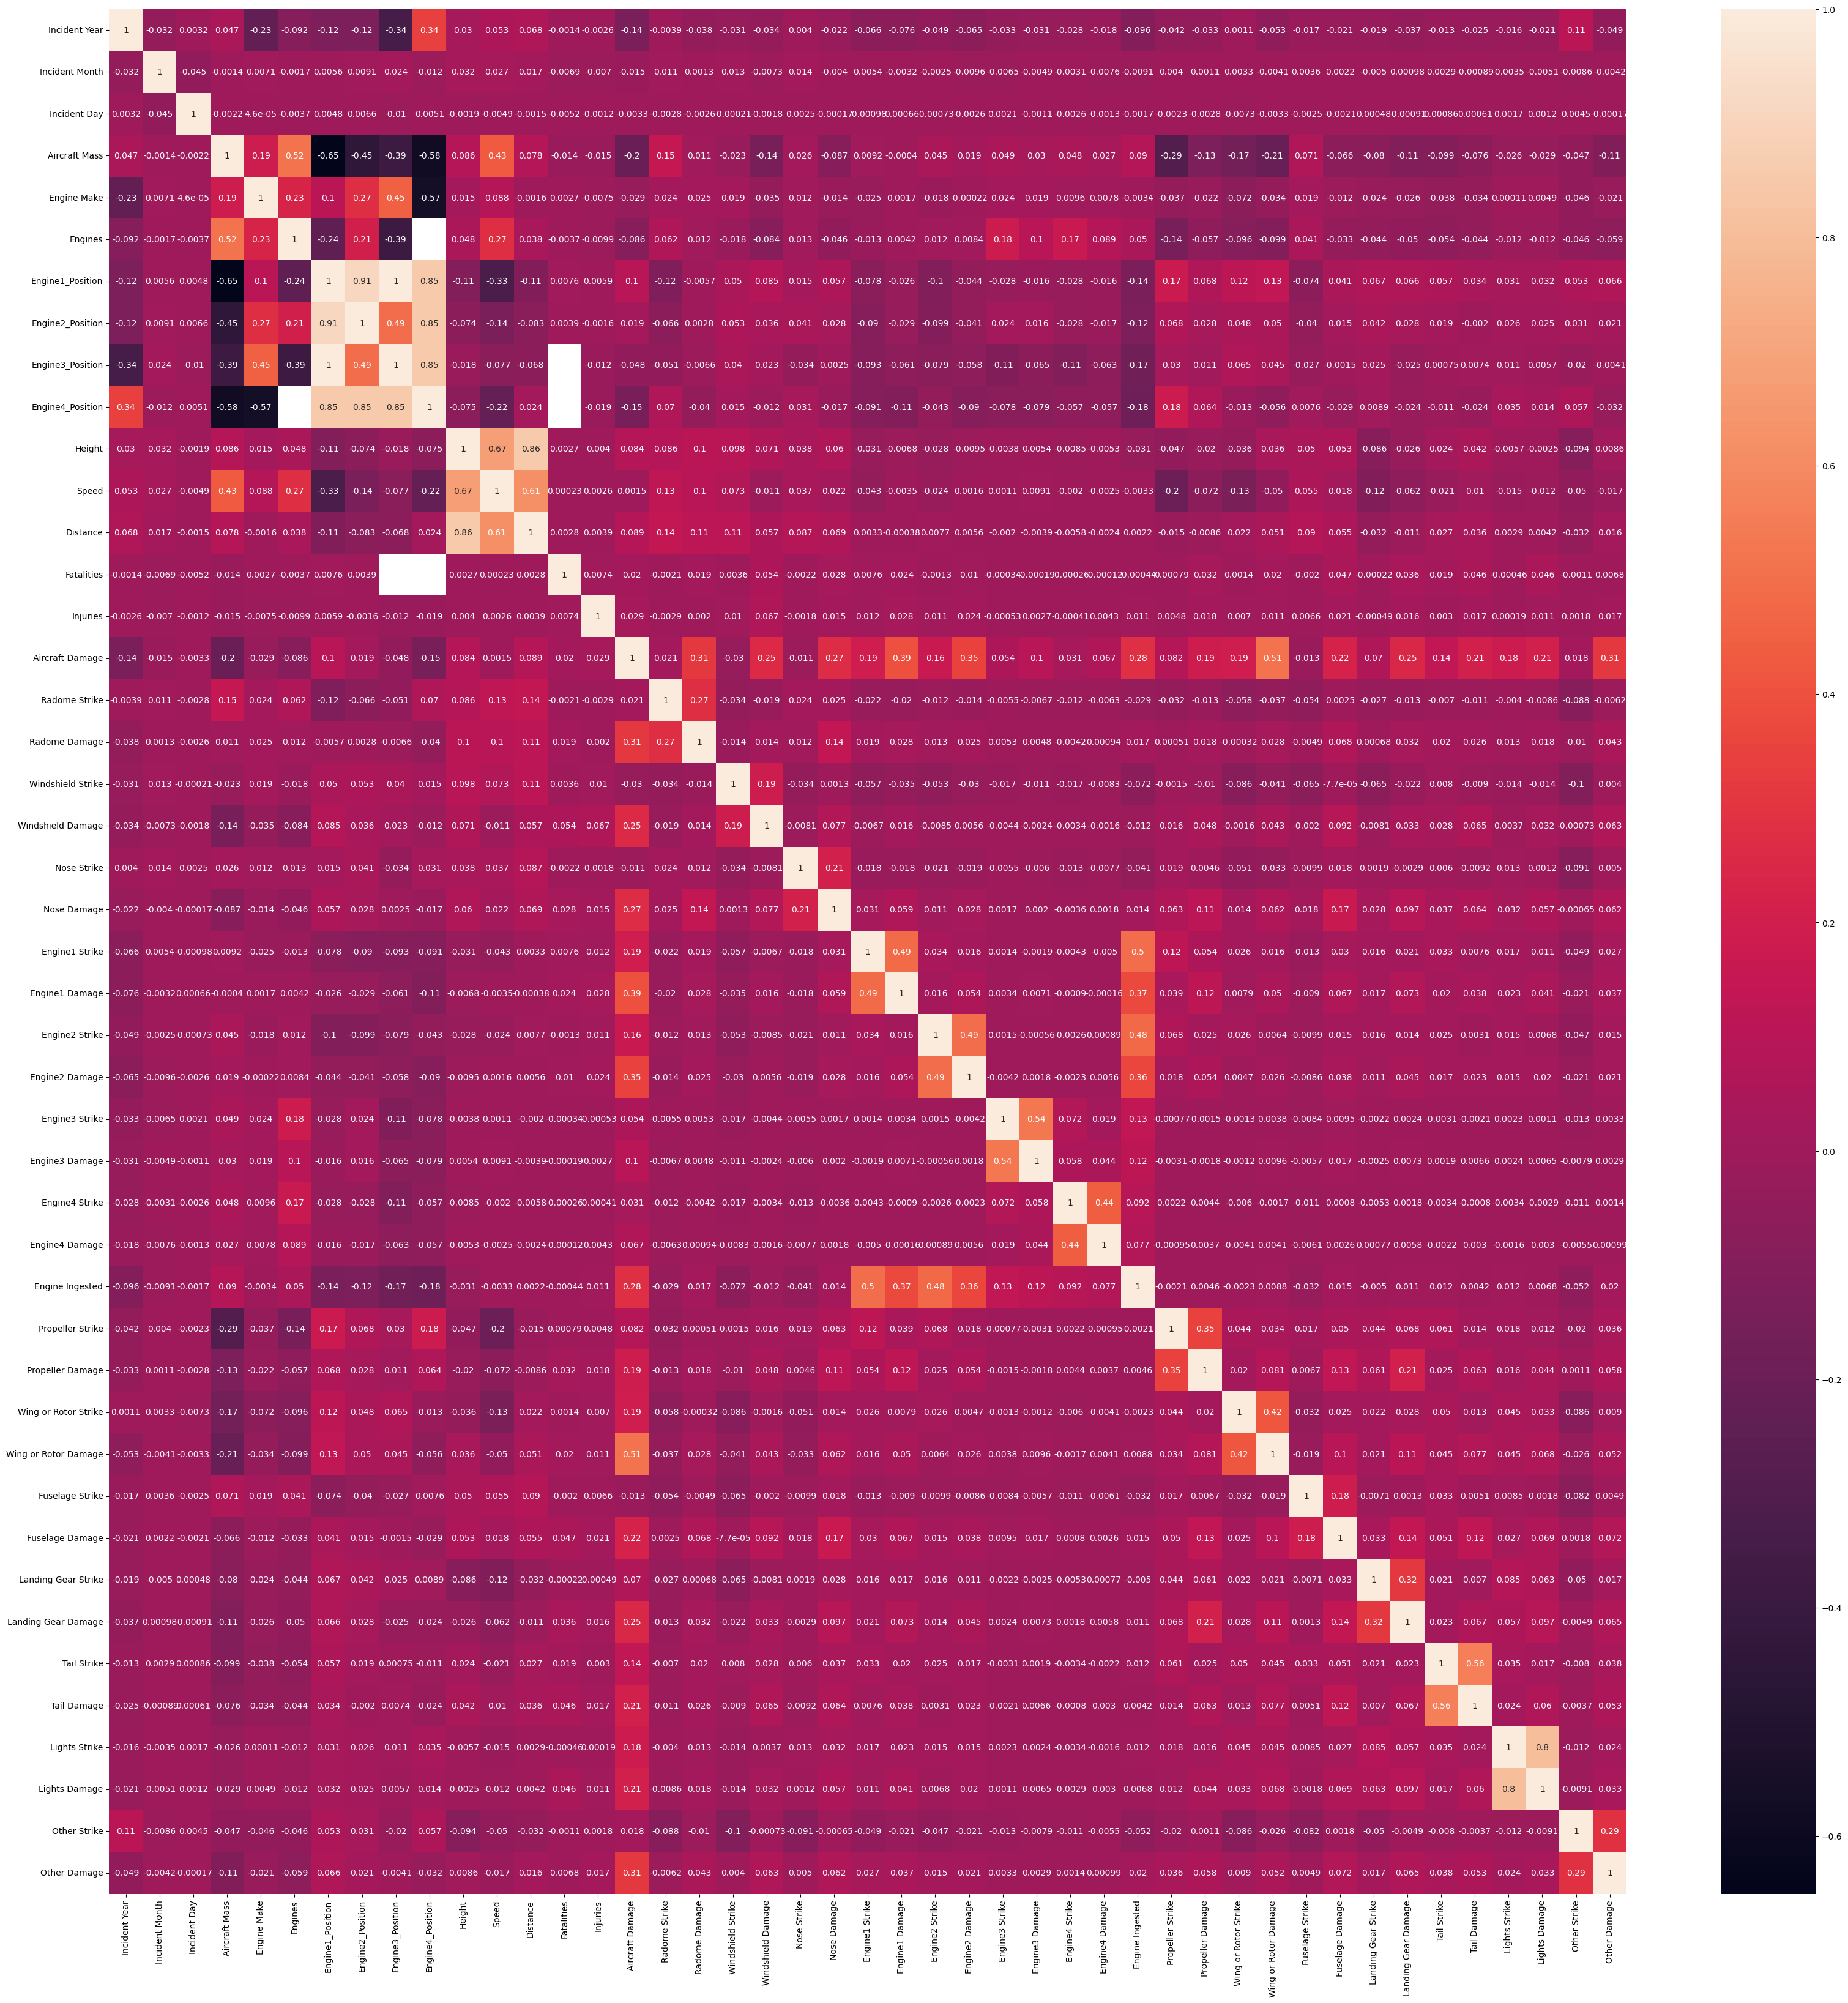

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True)